In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/knee-project

/content/drive/MyDrive/knee-project


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.15.0


#Data Preprocessing

In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/knee-project/MedicalExpert-I/knee-dataset/x-ray'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Normal': 0, 'Doubtful': 1, 'Mild': 2, 'Moderate': 3, 'Severe': 4}
['Normal', 'Doubtful', 'Mild', 'Moderate', 'Severe']
[0, 1, 2, 3, 4]


In [ ]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            label.append(label_dict[category])
        except Exception as e:
            print('Exception:',e)


# Recale and assign  catagorical labels

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from tensorflow.python.keras.utils import np_utils
new_label=np_utils.to_categorical(label)

In [ ]:
new_label.shape

(3300, 5)

#CNN Model

In [ ]:
data.shape

(3300, 256, 256, 1)

In [ ]:
data.shape[1:]

(256, 256, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
model=Sequential()
model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     1280      
                                                                 
 activation (Activation)     (None, 254, 254, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

# Splitting data into traning and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

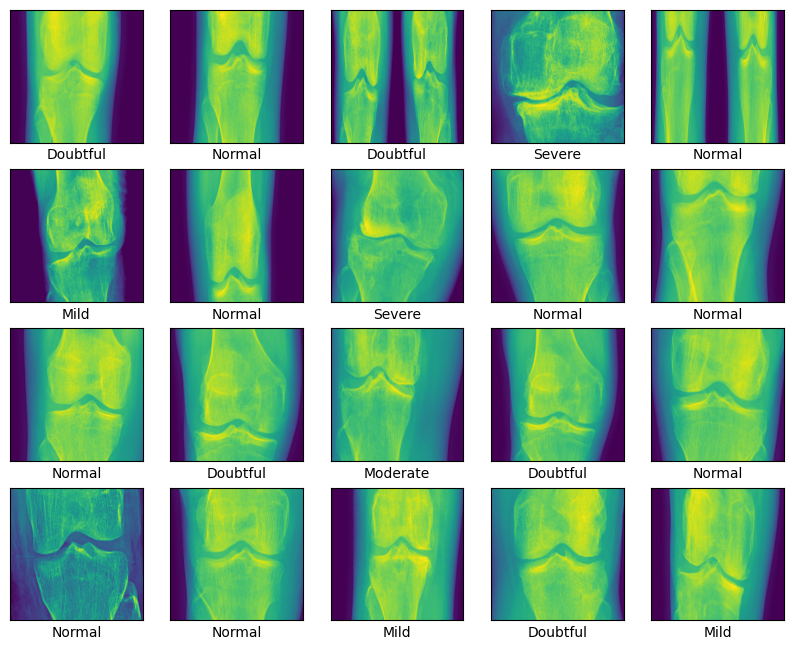

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
75/75 [==============================] - 23s 185ms/step - loss: 1.5131 - accuracy: 0.3161 - val_loss: 1.4334 - val_accuracy: 0.3620
Epoch 2/100
75/75 [==============================] - 9s 126ms/step - loss: 1.4330 - accuracy: 0.3729 - val_loss: 1.3917 - val_accuracy: 0.3956
Epoch 3/100
75/75 [==============================] - 9s 124ms/step - loss: 1.3817 - accuracy: 0.3965 - val_loss: 1.3379 - val_accuracy: 0.4040
Epoch 4/100
75/75 [==============================] - 9s 126ms/step - loss: 1.3104 - accuracy: 0.4318 - val_loss: 1.2977 - val_accuracy: 0.4259
Epoch 5/100
75/75 [==============================] - 9s 126ms/step - loss: 1.2474 - accuracy: 0.4823 - val_loss: 1.2592 - val_accuracy: 0.4293
Epoch 6/100
75/75 [==============================] - 9s 126ms/step - loss: 1.1820 - accuracy: 0.5080 - val_loss: 1.1863 - val_accuracy: 0.4832
Epoch 7/100
75/75 [==============================] - 9s 126ms/step - loss: 1.0821 - accuracy: 0.5455 - val_loss: 1.1060 - val_accuracy: 0.511

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from matplotlib import pyplot as plt

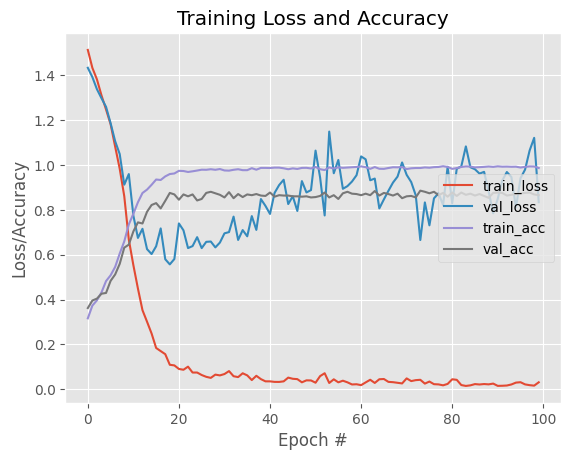

In [ ]:

N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

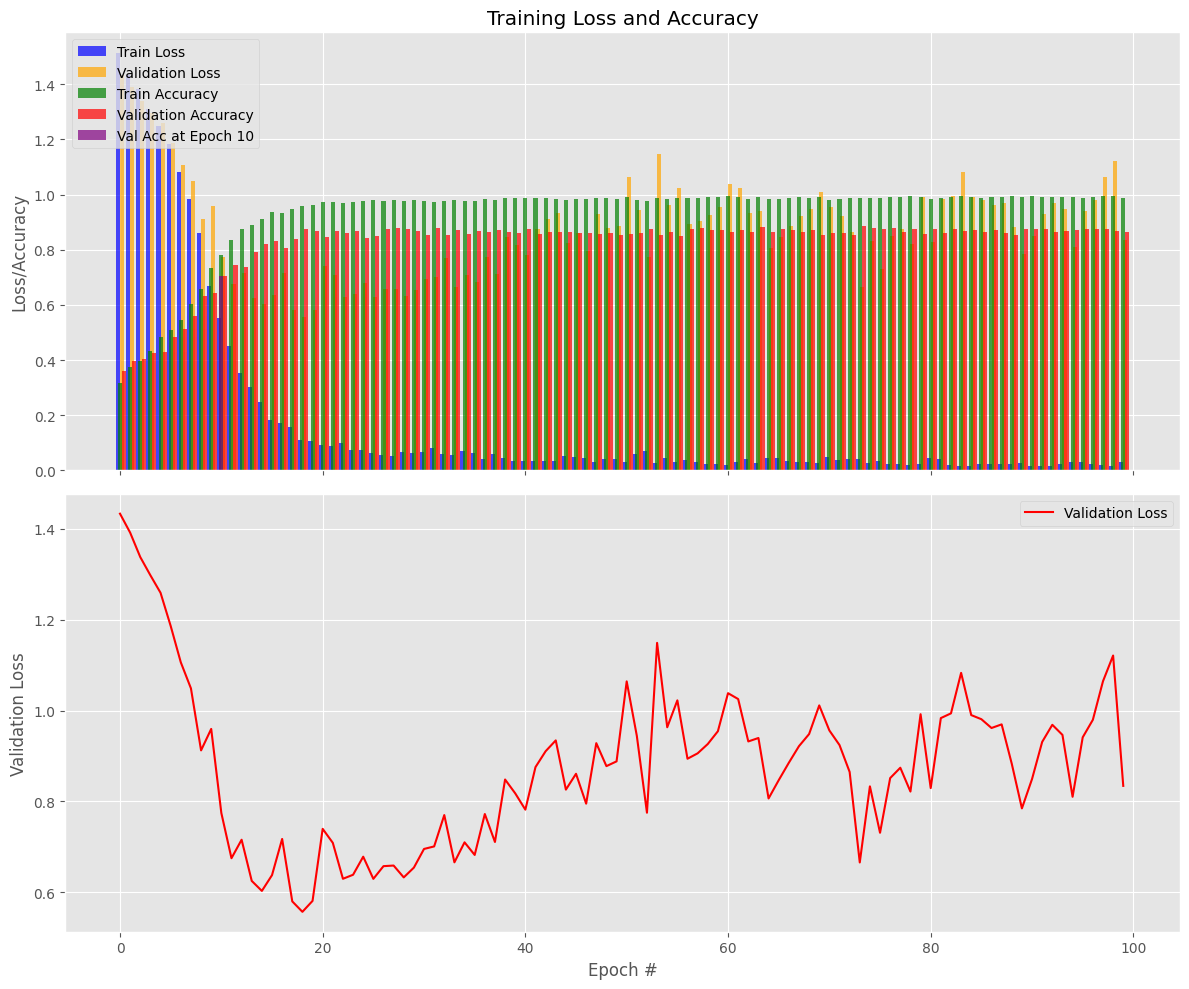

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
N = 100
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
ax1.bar(np.arange(0, N) - 0.2, history.history["loss"], width=0.4, label="Train Loss", align='center', color='blue', alpha=0.7)
ax1.bar(np.arange(0, N) + 0.2, history.history["val_loss"], width=0.4, label="Validation Loss", align='center', color='orange', alpha=0.7)
ax1.bar(np.arange(0, N) - 0.2, history.history["accuracy"], width=0.4, label="Train Accuracy", align='edge', color='green', alpha=0.7)
ax1.bar(np.arange(0, N) + 0.2, history.history["val_accuracy"], width=0.4, label="Validation Accuracy", align='edge', color='red', alpha=0.7)
eval_point = 10
ax1.bar(eval_point, history.history["val_accuracy"][eval_point], width=0.4, label="Val Acc at Epoch 10", color='purple', alpha=0.7)
ax1.set_title("Training Loss and Accuracy")
ax1.set_ylabel("Loss/Accuracy")
ax1.legend(loc="upper left")
ax2.plot(np.arange(0, N), history.history["val_loss"], label="Validation Loss", color='red')
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Validation Loss")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()

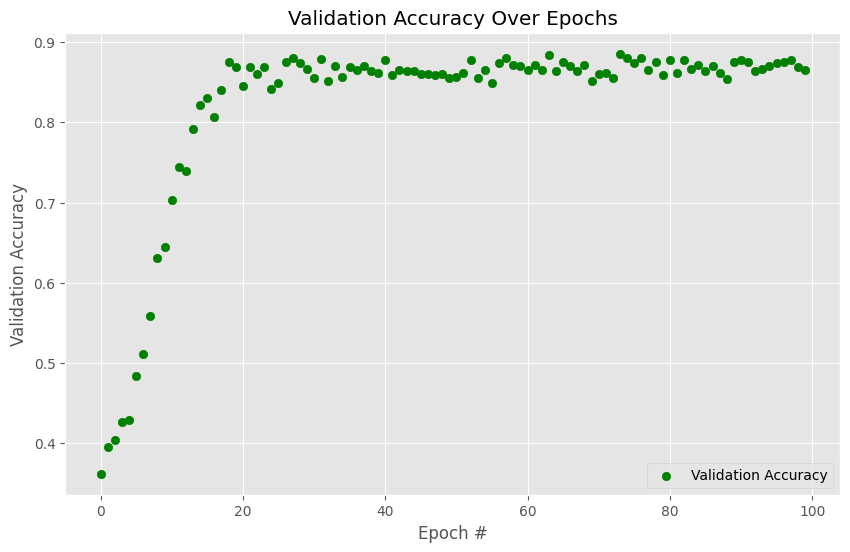

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
N = 100
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(0, N), history.history["val_accuracy"], label="Validation Accuracy", color='green')
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch #")
plt.ylabel("Validation Accuracy")
plt.legend(loc="lower right")
plt.show()

In [ ]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 0.7169907093048096 %
test accuracy: 0.903030276298523 %


1/1 [==============================] - 0s 269ms/step
A.I predicts: Moderate
Correct prediction for label 2 is Mild


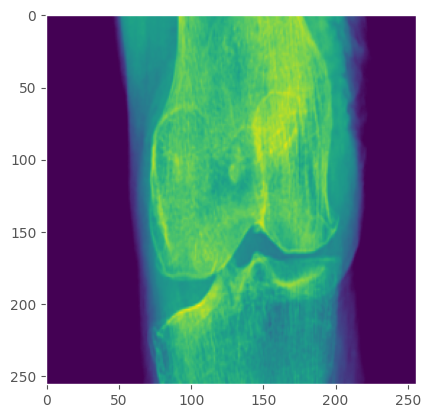

In [ ]:
X = 33

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

11/11 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>

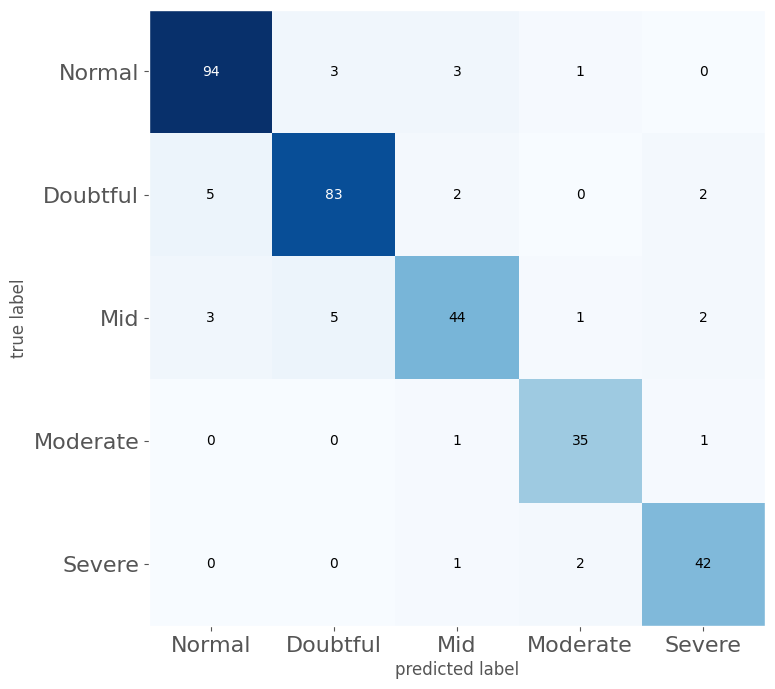

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()